In [1]:
%matplotlib inline

In [2]:
import torch
import numpy as np

from agent.agent import Agent
from functions import *

stock_name = 'samsung_2019'
window_size = 10

agent = Agent(window_size, True)
data = getStockDataVec(stock_name)
l = len(data) - 1
batch_size = 32

state = getState(data, 0, window_size + 1)
total_profit = 0
agent.inventory = []
closes = []
buys = []
sells = []
capital = 100000000

for t in range(l):
    action = agent.act(state)
    closes.append(data[t])

    # sit
    next_state = getState(data, t + 1, window_size + 1)
    reward = 0

    if action == 1: # buy
        if capital > data[t]:
            agent.inventory.append(data[t])
            buys.append(data[t])
            sells.append(None)
            capital -= data[t]
        else:
            buys.append(None)
            sells.append(None)

    elif action == 2: # sell
        if len(agent.inventory) > 0:
            bought_price = agent.inventory.pop(0)
            reward = max(data[t] - bought_price, 0)
            total_profit += data[t] - bought_price
            buys.append(None)
            sells.append(data[t])
            capital += data[t]
        else:
            buys.append(None)
            sells.append(None)
    elif action == 0:
        buys.append(None)
        sells.append(None)

    done = True if t == l - 1 else False
    agent.memory.push(state, action, next_state, reward)
    state = next_state

    if done:
        print("--------------------------------")
        print(stock_name + " Total Profit: " + formatPrice(total_profit))
        print("--------------------------------")


--------------------------------
samsung_2019 Total Profit: -KRW 550.0
--------------------------------


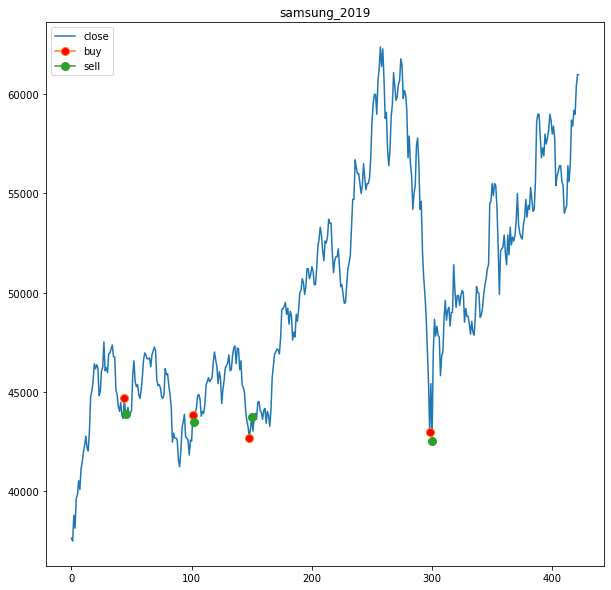

In [3]:
import matplotlib.pyplot as plt
import numpy as np


x_data = range(l)

# From here the plotting starts

plt.figure(figsize=(10, 10))
plt.plot(x_data, closes)
plt.plot(x_data, buys, marker='o', markersize=8, markerfacecolor='r')
plt.plot(x_data, sells, marker='o', markersize=8, )
plt.title(stock_name)
plt.legend(['close', 'buy', 'sell'], loc='upper left')
plt.show()